## Importing Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [6]:
data = data.drop(["CustomerID"],axis=1)

In [7]:
data.shape

(200, 4)

In [8]:
data.tail()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

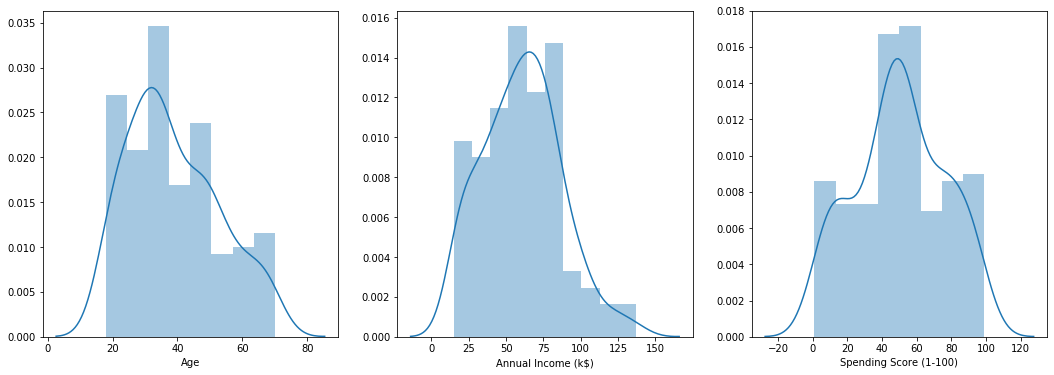

In [9]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(data["Age"])

plt.subplot(1,3,2)
sns.distplot(data["Annual Income (k$)"])

plt.subplot(1,3,3)
sns.distplot(data["Spending Score (1-100)"])

plt.show()

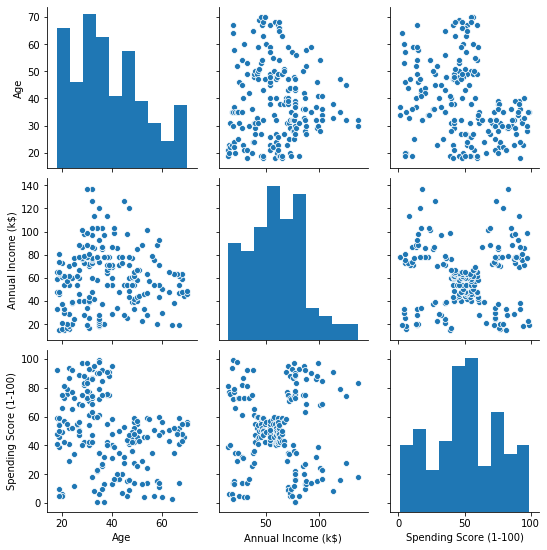

In [10]:
sns.pairplot(data)
plt.show()

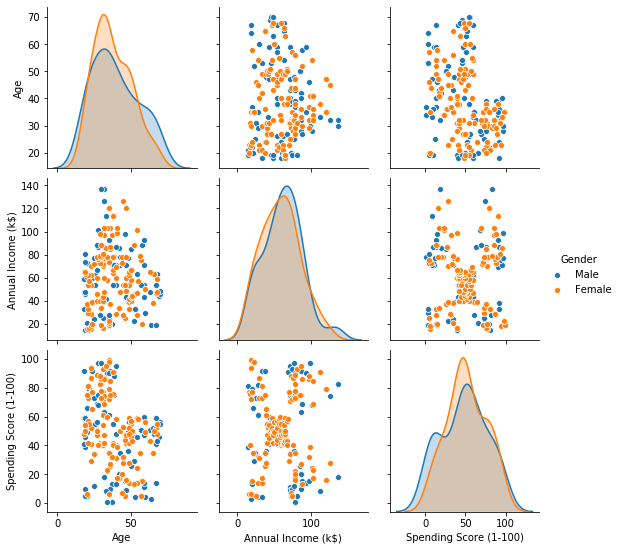

In [11]:
sns.pairplot(data, hue="Gender")
plt.show()

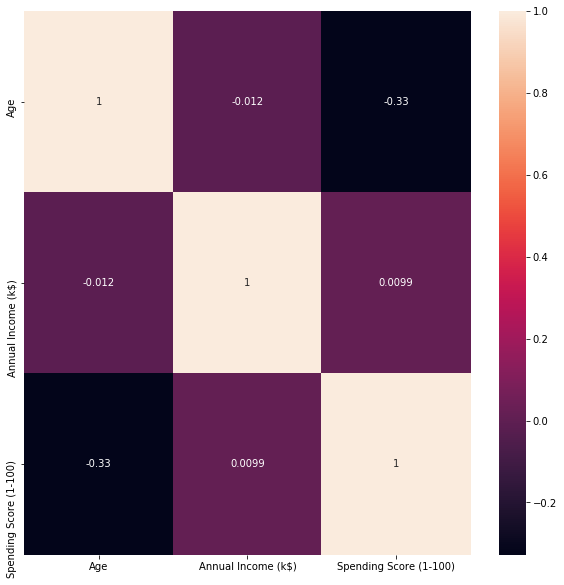

In [12]:
fig,ax = plt.subplots(figsize=(10, 10))

sns.heatmap(data.corr(), ax=ax, annot=True)

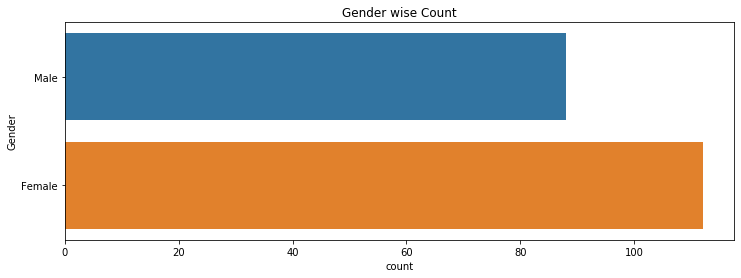

In [13]:
plt.figure(1, figsize=(12,4))
sns.countplot(y="Gender", data=data)
plt.title("Gender wise Count")
plt.show()

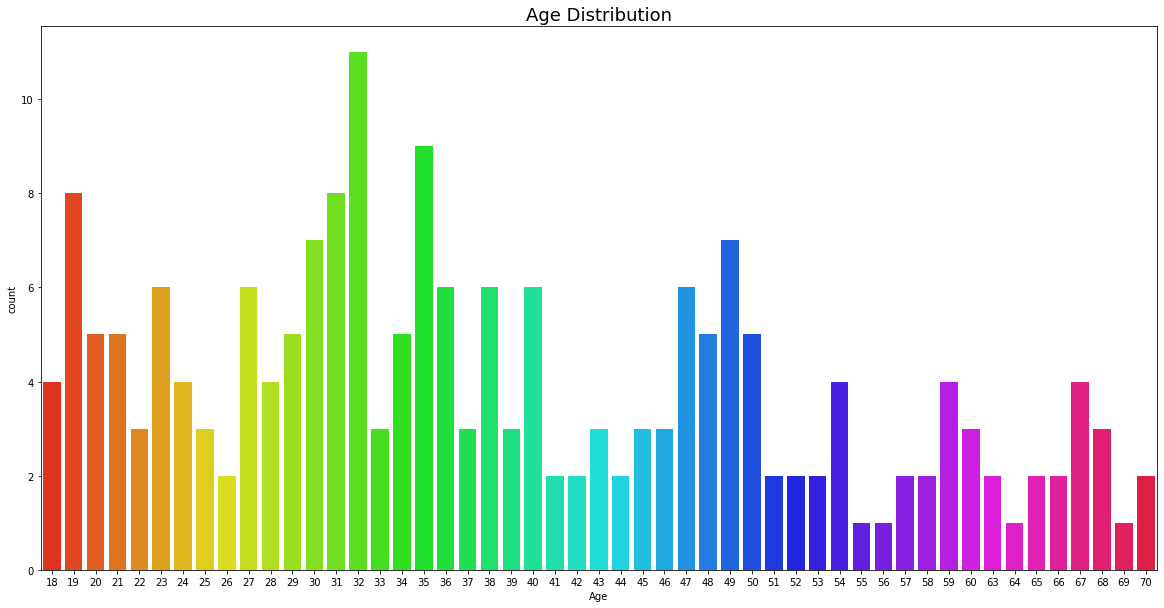

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age",data=data, palette="hsv")
plt.title("Age Distribution",fontsize=18)
plt.show()

Text(0.5, 1.0, 'Income vs Spending Score w.r.t Gender')

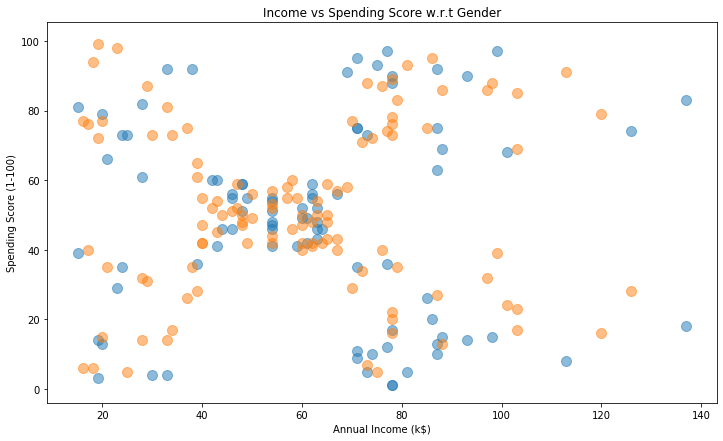

In [15]:
plt.figure(figsize=(12,7))
for gender in ["Male","Female"]:
    plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", s=100, data=data[data["Gender"]==gender], alpha=0.5, label=gender)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Income vs Spending Score w.r.t Gender")

Text(0.5, 1.0, 'Age vs Spending Score w.r.t Gender')

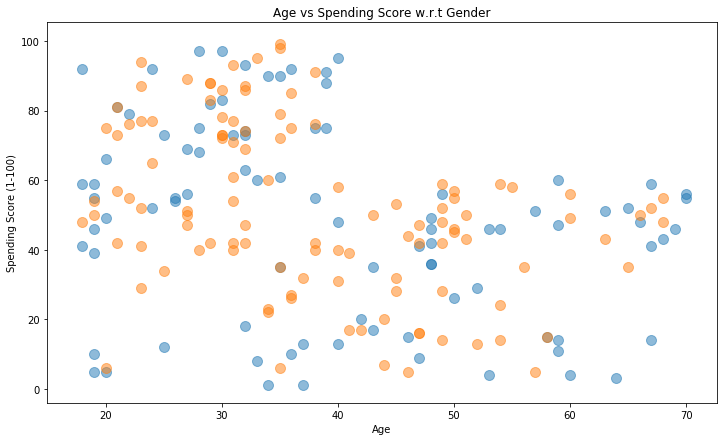

In [16]:
plt.figure(figsize=(12,7))
for gender in ["Male","Female"]:
    plt.scatter(x="Age", y="Spending Score (1-100)", s=100, data=data[data["Gender"]==gender], alpha=0.5, label=gender)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score w.r.t Gender")

# K Means

## Annual Income vs Spending Score Clusters

In [17]:
df = data.iloc[:, [2,3]].values
data.iloc[:,[2,3]]

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [18]:
from sklearn.cluster import KMeans

k_iner = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(df);
    k_iner.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

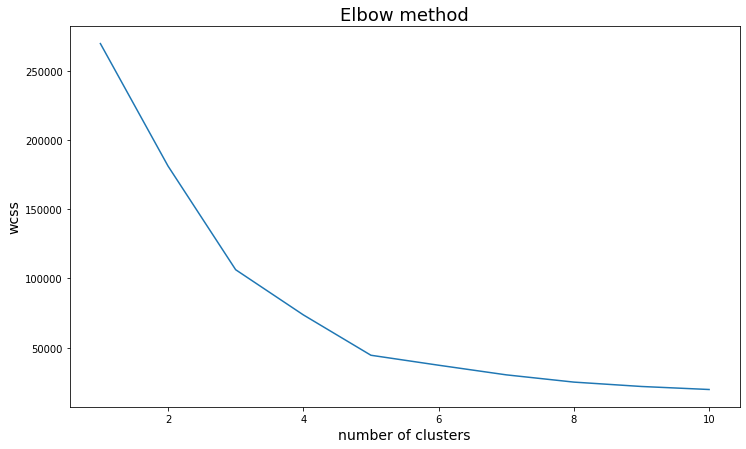

In [19]:
plt.figure(figsize=(12,7))
plt.plot(range(1,11), k_iner)
plt.title("Elbow method", fontsize=18)
plt.xlabel("number of clusters", fontsize=14)
plt.ylabel("wcss", fontsize=14)

In [20]:
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=0)
y = kmeans_model.fit(df)
y_cluster = y.predict(df)

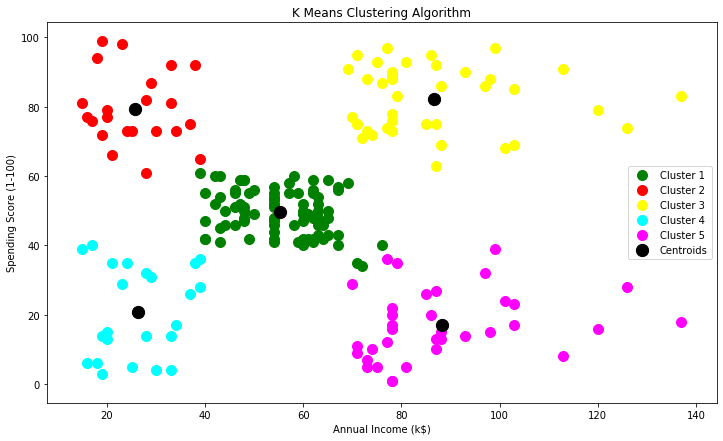

In [21]:
plt.figure(figsize=(12,7))

plt.scatter(df[y_cluster == 0, 0], df[y_cluster == 0, 1], s=100, c="green", label="Cluster 1")
plt.scatter(df[y_cluster == 1, 0], df[y_cluster == 1, 1], s=100, c="red", label="Cluster 2")
plt.scatter(df[y_cluster == 2, 0], df[y_cluster == 2, 1], s=100, c="yellow", label="Cluster 3")
plt.scatter(df[y_cluster == 3, 0], df[y_cluster == 3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(df[y_cluster == 4, 0], df[y_cluster == 4, 1], s=100, c="magenta", label="Cluster 5")
plt.scatter(y.cluster_centers_[:, 0], y.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')

plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [22]:
###Model Interpretation 
#Cluster 1 (Green Color) -> average in terms of earning and spending 
#cluster 2 (Red Colr) ->  earning less but spending more
#cluster 3 (Yellow Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> Earning less , spending less
#Cluster 5 (magenta Color) -> earning high but spending less

## Age vs Spending Score Clusters

In [23]:
df2 = data.iloc[:, [1,3]].values
data.iloc[:,[1,3]]

Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]

In [24]:
from sklearn.cluster import KMeans

k_iner = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(df2);
    k_iner.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

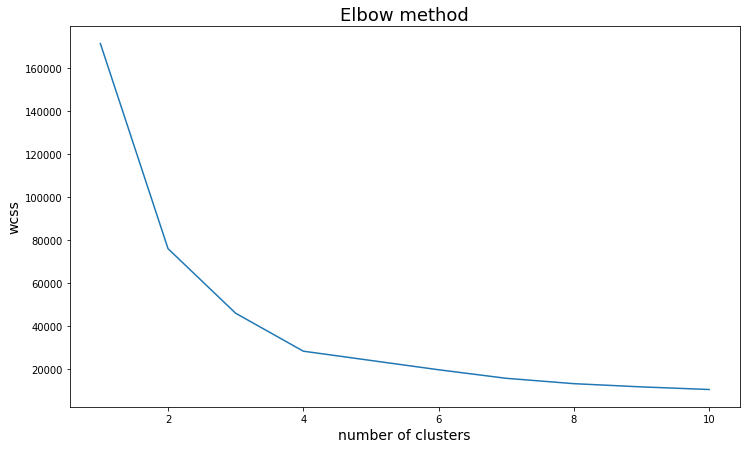

In [25]:
plt.figure(figsize=(12,7))
plt.plot(range(1,11), k_iner)
plt.title("Elbow method", fontsize=18)
plt.xlabel("number of clusters", fontsize=14)
plt.ylabel("wcss", fontsize=14)

In [26]:
kmeans_model = KMeans(n_clusters=4, init="k-means++", random_state=0)
y = kmeans_model.fit(df2)
y_cluster = y.predict(df2)

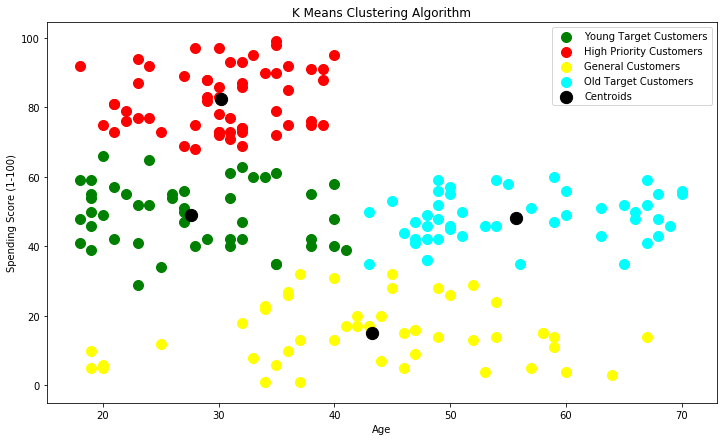

In [27]:
plt.figure(figsize=(12,7))

plt.scatter(df2[y_cluster == 0, 0], df2[y_cluster == 0, 1], s=100, c="green", label="Young Target Customers")
plt.scatter(df2[y_cluster == 1, 0], df2[y_cluster == 1, 1], s=100, c="red", label="High Priority Customers")
plt.scatter(df2[y_cluster == 2, 0], df2[y_cluster == 2, 1], s=100, c="yellow", label="General Customers")
plt.scatter(df2[y_cluster == 3, 0], df2[y_cluster == 3, 1], s=100, c="cyan", label="Old Target Customers")
plt.scatter(y.cluster_centers_[:, 0], y.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')

plt.title('K Means Clustering Algorithm')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Cluster

## Annual Income vs Spending Score Clusters

In [28]:
df3 = data.iloc[:, [2,3]].values
data.iloc[:,[2,3]]

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

Text(0.5, 1.0, 'Dendrogram')

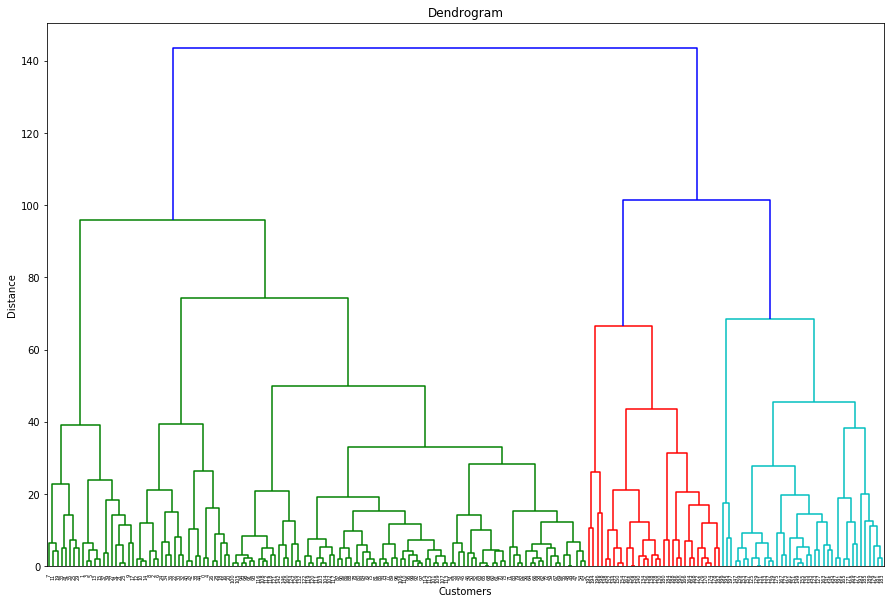

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15,10))
mergings = linkage(df3, method="complete", metric="euclidean")
dendrogram(mergings)
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.title("Dendrogram")

In [30]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_model = AgglomerativeClustering(n_clusters=5, linkage="complete", affinity="euclidean")
y_cluster = hierarchical_model.fit_predict(df)

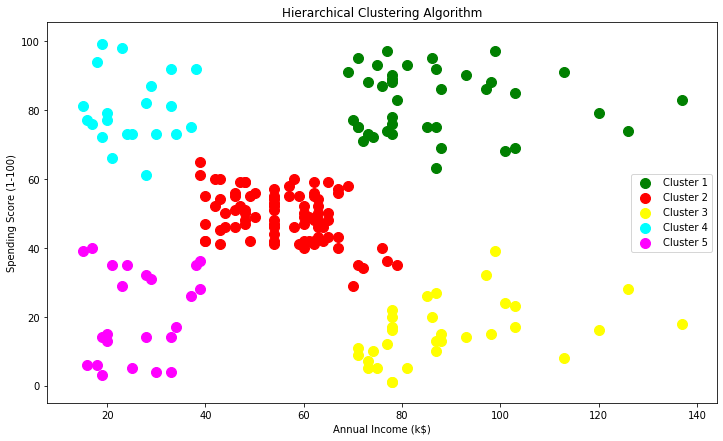

In [31]:
plt.figure(figsize=(12,7))

plt.scatter(df[y_cluster == 0, 0], df[y_cluster == 0, 1], s=100, c="green", label="Cluster 1")
plt.scatter(df[y_cluster == 1, 0], df[y_cluster == 1, 1], s=100, c="red", label="Cluster 2")
plt.scatter(df[y_cluster == 2, 0], df[y_cluster == 2, 1], s=100, c="yellow", label="Cluster 3")
plt.scatter(df[y_cluster == 3, 0], df[y_cluster == 3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(df[y_cluster == 4, 0], df[y_cluster == 4, 1], s=100, c="magenta", label="Cluster 5")

plt.title('Hierarchical Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()